# TIME SERIES FORECASTING 
# PREDICCIÓN SERIES TEMPORALES 

## 0. Importamos librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


## 1. Generar datos sintéticos (tendencia + ruido)

In [2]:

np.random.seed(42)
n_points = 100
time = np.arange(n_points)
# Tendencia lineal simple + ruido gaussiano
data = 0.5 * time + np.random.normal(scale=5, size=n_points)
# Crear un Pandas Series con índice de tiempo (simplificado)
ts = pd.Series(data, index=pd.RangeIndex(start=0, stop=n_points))

print("Serie Temporal Sintética (primeros 10 puntos):")
print(ts.head(10))
print("\n")

Serie Temporal Sintética (primeros 10 puntos):
0     2.483571
1    -0.191322
2     4.238443
3     9.115149
4     0.829233
5     1.329315
6    10.896064
7     7.337174
8     1.652628
9     7.212800
dtype: float64





## 2. Separar en Train/Test (manteniendo el orden)

In [3]:


train_size = int(len(ts) * 0.8)
train, test = ts[0:train_size], ts[train_size:]

print(f"Tamaño del Train set: {len(train)}")
print(f"Tamaño del Test set: {len(test)}")
print("\n")

Tamaño del Train set: 80
Tamaño del Test set: 20





## 3. Implementar Forecasting con Media Móvil Simple

In [ ]:

window_size = 5 # Usar los últimos 5 puntos para predecir el siguiente
predictions = []

# Usamos los últimos 'window_size' puntos del train set para la primera predicción del test set
history = train.tolist() # Convertimos a lista para añadir fácilmente

for t in range(len(test)):
    # Calcular la media de los últimos 'window_size' valores
    current_window = history[-window_size:]
    yhat = np.mean(current_window)
    predictions.append(yhat)
    # Añadir el valor real del test set al histórico para la siguiente predicción
    # (Esto simula cómo se usaría en la práctica: predecir un paso, observar, predecir el siguiente)
    history.append(test.iloc[t])

# Crear una serie de Pandas para las predicciones con el índice correcto
predictions_series = pd.Series(predictions, index=test.index)

## 4. Evaluar el modelo

In [5]:

mse = mean_squared_error(test, predictions_series)
rmse = np.sqrt(mse)
print(f"--- Modelo: Media Móvil Simple (Ventana={window_size}) ---")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")


--- Modelo: Media Móvil Simple (Ventana=5) ---
Test MSE: 17.9896
Test RMSE: 4.2414


## 5. Visualizar los resultados

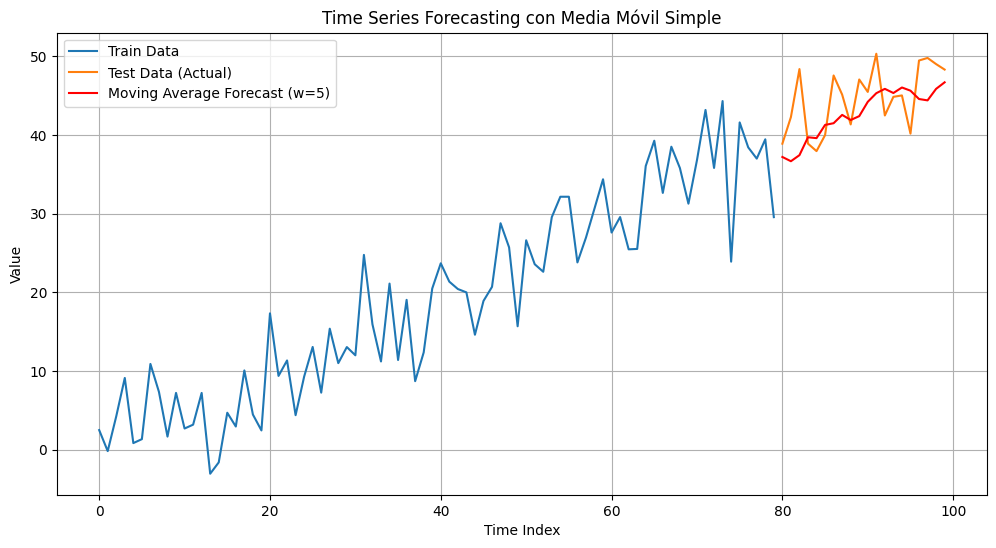

In [6]:

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Test Data (Actual)')
plt.plot(predictions_series.index, predictions_series, label=f'Moving Average Forecast (w={window_size})', color='red')
plt.title('Time Series Forecasting con Media Móvil Simple')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()